In [118]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
import string
import matplotlib.pyplot as plt
import sklearn.feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer

In [119]:
# text='''The Fictitious Time Integration Method (FTIM) previously developed by Liu and Atluri (2008a) is employed here to solve a system of ill-posed linear algebraic equations, which may result from the discretization of a first-kind linear Fredholm integral equation. We rationalize the mathematical foundation of the FTIM by relating it to the well-known filter theory. For the linear ordinary differential equations which are obtained through the FTIM (and which are equivalently used in FTIM to solve the ill-posed linear algebraic equations), we find that the fictitous time plays the role of a regularization parameter, and its filtering effect is better than that of the Tikhonov and the exponential filters. Then, we apply this new method to solve the problem of numerical differentiation of noisy data [such as finding da/dN in fatigue, where a is the measured crack-length and N is the number of load cycles], and the inversion of the Abel integral equation under noise. It is established that the numerical method of FTIM is robust against the noise.
# '''
text='''An analysis is given of a model of a semimetal with isotropic electron and hole spectra, separated in momentum space. The applied magnetic field is assumed to be strong enough to ensure that only one quantum level participates in each spectrum. The overlapping of levels is such that the Fermi energy is greater than the binding energy of the particle pairs. Weak point interaction is assumed to operate between the particles, which is valid for fields and dielectric constants that are not too high. The sign of the interaction can be arbitrary. Since the analysis is concerned with spinless fermions (degeneracy removed by the field), the system exhibits interactions between electrons and holes, but there is no interaction between particles of the same kind. It is shown that Cooper pairing of particles with the same charge is absent, but electron-hole excitons are formed, i.e., the transition to a dielectric takes place. The problem leads to "parquet" equations and is therefore solved only with logarithmic accuracy. A general method is developed for finding the "anomalous" averages corresponding to pairing, and the binding energies from "asymmetric" parquet vertices. '''
title='The Metal-Dielectric Transition in Semimetals in Extremely High Magnetic Fields .'
unprocessedtext=''' '''



In [120]:
text=text.lower()
text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
sents=sent_tokenize(text)
for i in range(len(sents)):
    translator=str.maketrans('','',string.punctuation)
    sents[i]=sents[i].translate(translator)
    print(sents[i])


analysis given model semimetal isotropic electron hole spectra separated momentum space
applied magnetic field assumed strong enough ensure one quantum level participates spectrum
overlapping levels fermi energy greater binding energy particle pairs
weak point interaction assumed operate particles valid fields dielectric constants high
sign interaction arbitrary
since analysis concerned spinless fermions degeneracy removed field system exhibits interactions electrons holes interaction particles kind
shown cooper pairing particles charge absent electronhole excitons formed ie transition dielectric takes place
problem leads parquet equations therefore solved logarithmic accuracy
general method developed finding anomalous averages corresponding pairing binding energies asymmetric parquet vertices


In [121]:
title=title.lower()
title = ' '.join([word for word in title.split() if word not in (stopwords.words('english'))])
translator=str.maketrans('','',string.punctuation)
title=title.translate(translator)
t=word_tokenize(title)


In [122]:
alltokes=[]
for word in t:
    alltokes.append(word)

for i in range(len(sents)):
    tokens=word_tokenize(sents[i])
    for x in tokens:
        alltokes.append(x)

In [123]:
print(alltokes)

['metaldielectric', 'transition', 'semimetals', 'extremely', 'high', 'magnetic', 'fields', 'analysis', 'given', 'model', 'semimetal', 'isotropic', 'electron', 'hole', 'spectra', 'separated', 'momentum', 'space', 'applied', 'magnetic', 'field', 'assumed', 'strong', 'enough', 'ensure', 'one', 'quantum', 'level', 'participates', 'spectrum', 'overlapping', 'levels', 'fermi', 'energy', 'greater', 'binding', 'energy', 'particle', 'pairs', 'weak', 'point', 'interaction', 'assumed', 'operate', 'particles', 'valid', 'fields', 'dielectric', 'constants', 'high', 'sign', 'interaction', 'arbitrary', 'since', 'analysis', 'concerned', 'spinless', 'fermions', 'degeneracy', 'removed', 'field', 'system', 'exhibits', 'interactions', 'electrons', 'holes', 'interaction', 'particles', 'kind', 'shown', 'cooper', 'pairing', 'particles', 'charge', 'absent', 'electronhole', 'excitons', 'formed', 'ie', 'transition', 'dielectric', 'takes', 'place', 'problem', 'leads', 'parquet', 'equations', 'therefore', 'solved'

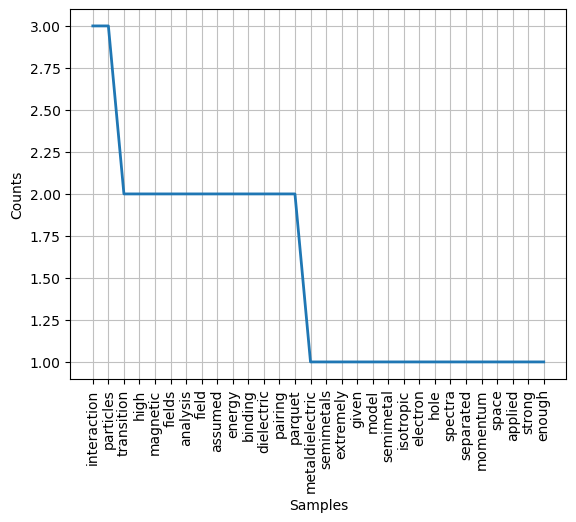

<Axes: xlabel='Samples', ylabel='Counts'>

In [124]:
freqtable=FreqDist(alltokes)
freqtable.plot(30)

In [125]:
def calculate_tfidf_scores(texts):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray()
    return feature_names, tfidf_scores

def sentence_scoring(text):
    sentences = sent_tokenize(text)
    word_scores = {}

    # Compute TF-IDF scores for words
    feature_names, tfidf_scores = calculate_tfidf_scores([text])
    for word, score in zip(feature_names, tfidf_scores[0]):
        word_scores[word] = score

    sentence_scores = []

    # Compute scores for each sentence
    for sentence in sentences:
        words = word_tokenize(sentence.lower())
        score = sum(word_scores.get(word, 0) for word in words) / len(words)
        sentence_scores.append((sentence, score))

    # Sort sentences based on scores in descending order
    sentence_scores.sort(key=lambda x: x[1], reverse=True)

    return sentence_scores

In [126]:
for i in range(len(sents)):
    print(sentence_scoring(sents[i]))

[('analysis given model semimetal isotropic electron hole spectra separated momentum space', 0.3015113445777637)]
[('applied magnetic field assumed strong enough ensure one quantum level participates spectrum', 0.288675134594813)]
[('overlapping levels fermi energy greater binding energy particle pairs', 0.3685138655950445)]
[('weak point interaction assumed operate particles valid fields dielectric constants high', 0.3015113445777637)]
[('sign interaction arbitrary', 0.5773502691896258)]
[('since analysis concerned spinless fermions degeneracy removed field system exhibits interactions electrons holes interaction particles kind', 0.25)]
[('shown cooper pairing particles charge absent electronhole excitons formed ie transition dielectric takes place', 0.26726124191242434)]
[('problem leads parquet equations therefore solved logarithmic accuracy', 0.35355339059327373)]
[('general method developed finding anomalous averages corresponding pairing binding energies asymmetric parquet vertic